# Intermediate Colleges of Pakistan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load the Dataset
df=pd.read_csv(r"C:\Users\PMLS\OneDrive\Desktop\CAREER\INTERNSHIPS\CODEX CUE INTERNSHIP\Task1\All the Intermediate Colleges in Pakistan.csv")

In [7]:
# Get the number of rows and columns in the DataFrame
df.shape

(1627, 6)

In [8]:
# Display the First 5 rows of Dataset
df.head(5)

,College Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore Punjab,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSCEngineering FSCMedical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H 8, Islamabad 44000",FSCEngineering ICS ComputerScience FSCMedical ...,Public,NaN,5*
2,Government College University Gcu Lahore Punjab,"GC University, Katchery Road Lahore Punjab 54000",FSCEngineering ICS ComputerScience FSCMedical ...,Public,HEC,4*
3,Govt College University GCU Faisalabad Punjab,"Kotwali Rd, Faisalabad Punjab 38000",FSCEngineering ICS FSCMedical Icom FA FA Gener...,Public,HEC,3*
4,Lahore Punjab College For Women University (Lc...,"Near Wapda Flats, Jail Road, Lahore Punjab",FA Arts FSCEngineering ICS PhysICS ICS Statist...,Public,NaN,5*


In [9]:
#Display information of the data
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   College Name   1627 non-null   object
 1   Location       1623 non-null   object
 2   Study Program  1627 non-null   object
 3   Sector         1098 non-null   object
 4   Affiliation    154 non-null    object
 5   Rating         1627 non-null   object
dtypes: object(6)
memory usage: 76.4+ KB


In [10]:
#Display Basic Statistical Details
(df.describe())

,College Name,Location,Study Program,Sector,Affiliation,Rating
count,1627,1623,1627,1098,154,1627
unique,1627,1570,747,2,96,21
top,Campus.pk Lahore Punjab,Chakwal Punjab,FA FSCEngineering FSCMedical FA General Scienc...,Private,University of Sargodha Punjab,0*
freq,1,11,53,559,7,1118


# Data Cleaning

In [11]:
#check for missing values
df.isnull().sum()

College Name        0
Location            4
Study Program       0
Sector            529
Affiliation      1473
Rating              0
dtype: int64

In [12]:
#Drop the Rows with Missing values of Location and Sector
df.dropna(subset=['Location', 'Sector'], inplace=True)

In [13]:
#check for missing values
df.isnull().sum()

College Name        0
Location            0
Study Program       0
Sector              0
Affiliation      1023
Rating              0
dtype: int64

In [14]:
df.shape

(1097, 6)

In [15]:
# Ensure the 'Rating' column is of string type, remove asterisks, convert to float, and store back in 'Rating'
df['Rating'] = df['Rating'].astype(str).str.replace('*', '').astype(float)
print(df)

                                           College Name  \
0                               Campus.pk Lahore Punjab   
1           Allama Iqbal Open University Aiou Islamabad   
2       Government College University Gcu Lahore Punjab   
3         Govt College University GCU Faisalabad Punjab   
4     Lahore Punjab College For Women University (Lc...   
...                                                 ...   
1622        Riphah International College Lodhran Punjab   
1623                 Govt College of Education Bagh AJK   
1624              Riphah International College Swat KPK   
1625           Riphah International College Dina Punjab   
1626            Riphah International College Dargai KPK   

                                               Location  \
0     Office 206, 2nd Floor Siddique Trade Center Ma...   
1                         Sector H  8, Islamabad  44000   
2      GC University, Katchery Road Lahore Punjab 54000   
3                   Kotwali Rd, Faisalabad Punjab 38000

In [16]:
# Extract region names from college names
def extract_region(Name):
    return Name.split()[-1]

# Apply the function to extract region names
df['region'] = df['College Name'].apply(extract_region)

# Display the first few rows to verify the extraction
print(df[['College Name', 'region']].head())


                                        College Name     region
0                            Campus.pk Lahore Punjab     Punjab
1        Allama Iqbal Open University Aiou Islamabad  Islamabad
2    Government College University Gcu Lahore Punjab     Punjab
3      Govt College University GCU Faisalabad Punjab     Punjab
4  Lahore Punjab College For Women University (Lc...     Punjab


# Distribution Analysis


In [17]:
print(df['region'].unique())


['Punjab' 'Islamabad' 'KPK' 'Balochistan' 'Sindh' 'AJK']


In [18]:
region_counts = df['region'].value_counts()
print(region_counts)


region
Punjab         818
KPK            124
Islamabad       90
Sindh           28
AJK             28
Balochistan      9
Name: count, dtype: int64


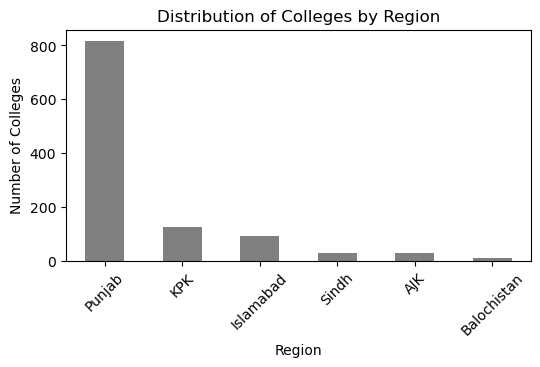

In [19]:
# Count the number of colleges in each region
region_counts = df['region'].value_counts()

# Ensure all regions are included
all_regions = ['Punjab', 'Islamabad', 'KPK', 'Balochistan', 'Sindh', 'AJK']
region_counts = region_counts.reindex(all_regions, fill_value=0)

# Sort the region counts in descending order
sorted_region_counts_desc = region_counts.sort_values(ascending=False)

# Plot the distribution of colleges by region in descending order
plt.figure(figsize=(6,3))
sorted_region_counts_desc.plot(kind='bar', xlabel='Region', ylabel='Number of Colleges', title='Distribution of Colleges by Region', color='grey')
plt.xticks(rotation=45)
plt.show()


In [20]:
print (df['Sector'].value_counts())

Sector
Private    558
Public     539
Name: count, dtype: int64


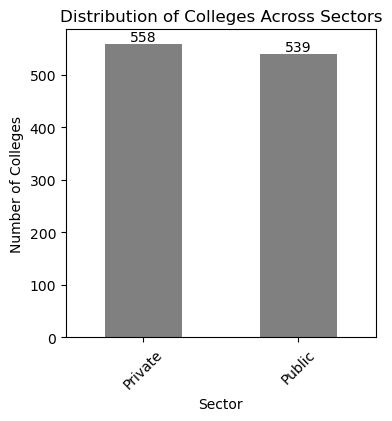

In [21]:
# Assuming 'Sector' is the column containing sector information in your DataFrame
sector_counts = df['Sector'].value_counts()

# Plotting a bar chart to visualize the distribution of colleges across sectors
plt.figure(figsize=(4, 4))
bar_plot = sector_counts.plot(kind='bar', color='grey')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.title('Distribution of Colleges Across Sectors')
plt.xticks(rotation=45)

# Adding labels to the bars
for index, value in enumerate(sector_counts):
    plt.text(index, value + 5, str(value), ha='center')

plt.show()

<Figure size 800x800 with 0 Axes>

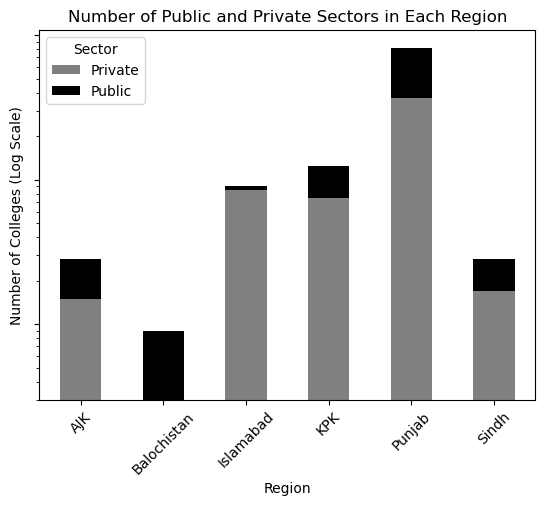

In [22]:
# Region wise Distribution of Sectors
region_sector_counts = df.groupby(['region', 'Sector']).size().unstack(fill_value=0)

# Plotting a grouped bar chart with logarithmic scale for the y-axis
plt.figure(figsize=(8, 8))
region_sector_counts.plot(kind='bar', stacked=True, color=['grey', 'Black'])
plt.xlabel('Region')
plt.ylabel('Number of Colleges (Log Scale)')
plt.title('Number of Public and Private Sectors in Each Region')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Sector')

# Remove numbers from y-axis
plt.gca().yaxis.set_ticklabels([])

plt.show()

In [23]:
# Count the number of colleges by affiliation and calculate the sum
total_colleges = df['Affiliation'].value_counts().sum()
print(f"Total number of colleges with affiliation: {total_colleges}")


Total number of colleges with affiliation: 74


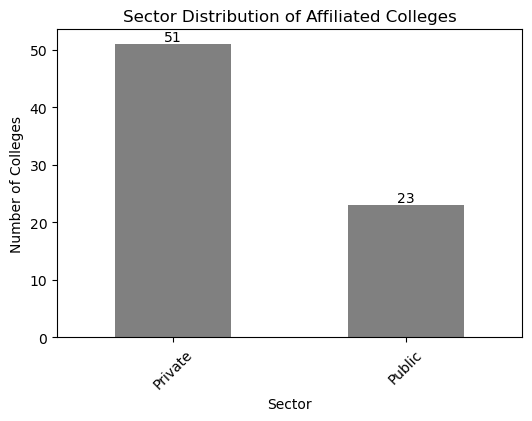

In [24]:

# Filter out rows where Affiliation is not NaN (assuming NaN indicates no affiliation)
affiliated_colleges = df[df['Affiliation'].notna()]

# Count the number of colleges in each sector for affiliated colleges
sector_counts = affiliated_colleges['Sector'].value_counts()

# Plotting the sector distribution for affiliated colleges
plt.figure(figsize=(6, 4))
bars = sector_counts.plot(kind='bar', color='grey')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.title('Sector Distribution of Affiliated Colleges')
plt.xticks(rotation=45)

# Adding labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom')

plt.show()


C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


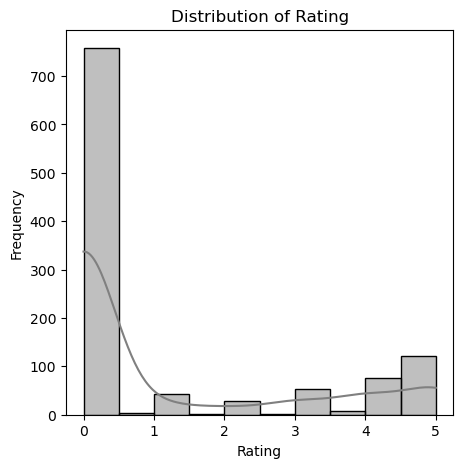

In [25]:
# Distribution of Rating

plt.figure(figsize=(5, 5))
sns.histplot(df['Rating'].astype(float), bins=10, kde=True, color='grey')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [26]:
Study_program= df['Study Program'].str.split()

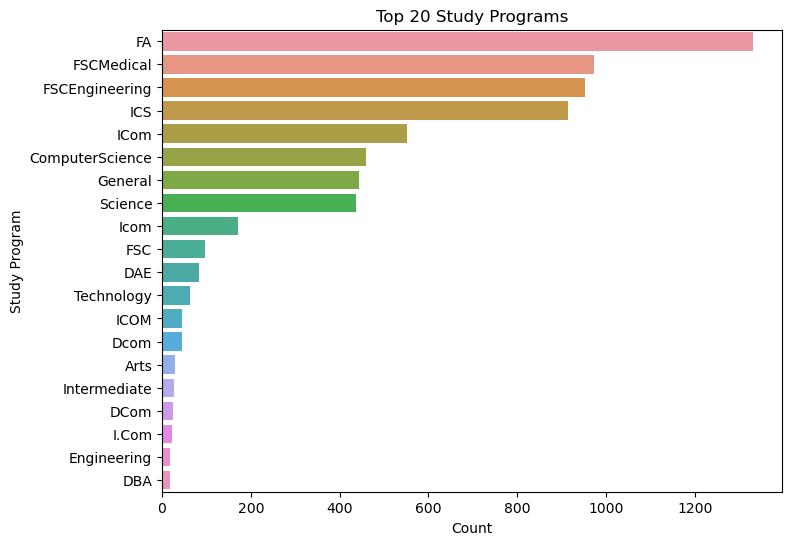

In [27]:
# Split the 'Study Program' column into individual components
df['Study Programs'] = df['Study Program'].str.split()

# Explode the DataFrame based on the 'Study Programs' column
df_exploded = df.explode('Study Programs')

# Count the occurrences of each split study program and select top 20
top_study_programs = df_exploded['Study Programs'].value_counts().head(20)

# Plotting the top 20 split study programs using seaborn (horizontal bar plot)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_study_programs.values, y=top_study_programs.index, orient='h')
plt.title('Top 20 Study Programs')
plt.xlabel('Count')
plt.ylabel('Study Program')
plt.show()

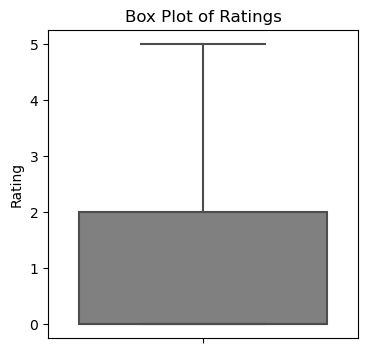

In [28]:

# Ensure 'Rating' column is of type float
df['Rating'] = df['Rating'].astype(float)

# box plotBfor the 'Rating' column
plt.figure(figsize=(4, 4))
sns.boxplot(y=df['Rating'], color='grey')
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()


In [35]:
output_file_path = r"C:\Users\PMLS\OneDrive\Desktop\CAREER\INTERNSHIPS\CODEX CUE INTERNSHIP\Task1\Completed\output.csv"
df.to_csv(output_file_path, index=False)
